# **TELECOM X**

La empresa **Telecom X** enfrenta una **alta tasa de cancelaciones** y necesita comprender los **factores** que llevan a la pérdida de clientes. Para tratar la problemática anterior, se buscará recopilar, procesar y analizar los datos provistos por la empresa y poder ayudarla con el desarrollo de estrategias para reducir la evasión de los clientes.

## 📌 **Extracción**

### **Importación de los datos**

In [1]:
# Importación de librerías a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url_datos = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

df = pd.read_json(url_datos) # Se asigna el DataFrame a la variable df para su posterior uso.
df.head(10) # Muestra las primeras 10 filas del DataFrame.

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
5,0013-MHZWF,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
6,0013-SMEOE,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
7,0014-BMAQU,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Two year', 'PaperlessBilling': '..."
8,0015-UOCOJ,No,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
9,0016-QLJIS,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


## 🔧 **Transformación**

In [3]:
df.info()

# Información de las columnas y filas del Dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.dtypes

# Estadísticas descriptivas del Dataframe.

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


### **Normalización de Datos**

Observando la información del **DataFrame (DF)**, este contiene objetos, ya que nuestra fuente es un **JSON (*JavaScript Object Notation*)** donde cada objeto contiene atributos los cuales también contienen información que ahora mismo no es visible. Para poder apreciar los demás datos que contienen estos objetos del **DF**, se debe normalizar para así generar un nuevo **DF** con los datos normalizados para hacer un tratamiento más preciso.

> La estructura de un **JSON** consiste en pares de clave y valor en listas ordenadas como los arreglos.

In [5]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Combinar todos los DataFrames normalizados
datos_normalizados = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)
datos_normalizados.info() # información de las columnas y filas del Dataframe normalizado.
datos_normalizados.dtypes # tipos de datos de las columnas del Dataframe normalizado.
datos_normalizados.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6621,9102-IAYHT,Yes,Female,0,Yes,Yes,17,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.45,1451.6
1558,2228-BZDEE,No,Female,0,No,No,54,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.10,1079.45
703,1009-IRMNA,Yes,Female,0,No,No,7,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.00,137.6
3321,4626-OZDTJ,No,Female,0,Yes,No,51,Yes,Yes,DSL,...,Yes,No,Yes,Yes,Yes,One year,Yes,Credit card (automatic),78.65,3950.85
1005,1407-DIGZV,No,Female,0,Yes,Yes,3,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,52


In [6]:
# Selección de las columnas que consideré más relevantes para el análisis de churn
columnas_relevantes = [
    'Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'tenure', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total'
]

# DataFrame con columnas relevantes
datos_clientes = datos_normalizados[columnas_relevantes].copy()

# Verificar el resultado
print(f"Columnas seleccionadas: {datos_clientes.shape[1]}")
print(f"Registros: {datos_clientes.shape[0]}")
datos_clientes.sample(5)

Columnas seleccionadas: 18
Registros: 7267


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6054,Yes,Male,1,No,No,2,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.45,47.5
6218,No,Female,1,Yes,Yes,48,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.50,5068.05
2842,Yes,Female,0,No,Yes,12,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.55,480.6
6642,No,Female,0,No,No,23,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),98.70,2249.1
766,No,Female,0,Yes,Yes,69,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),105.10,7234.8


#### **Comprobación de incoherencias en los datos**

In [7]:
print('Valores ausentes por columna:')
print(datos_clientes.isnull().sum())

print('\nNúmero de filas duplicadas antes de eliminar:')
datos_duplicados = datos_clientes.duplicated().sum()
print(datos_duplicados)

if datos_duplicados > 0:
    datos_clientes.drop_duplicates(inplace=True)
    print(f'\nSe eliminaron {datos_duplicados} filas duplicadas.')
    print(f'Nuevo número de filas en el DataFrame: {datos_clientes.shape[0]}')
else:
    print('\nNo se encontraron filas duplicadas para eliminar.')

Valores ausentes por columna:
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Número de filas duplicadas antes de eliminar:
22

Se eliminaron 22 filas duplicadas.
Nuevo número de filas en el DataFrame: 7245


Como la columna `Charges.Total` se cargó inicialmente como tipo `object` porque había cadenas vacías o valores no numéricos. Es oportuno convertirla a un tipo numérico como el(`float`) porque indica el total de todos los servicios de un cliente. Los valores que no puedan convertirse se transformarán en `NaN` y luego se añadirán con la media de la columna.

In [8]:
import warnings # Para ignorar advertencias
warnings.filterwarnings('ignore')

print(f"Tipo de dato actual de 'Charges.Total': {datos_clientes['Charges.Total'].dtype}")

# Para reemplazar espacios en blanco con NaN y luego convertir a float
datos_clientes['Charges.Total'] = pd.to_numeric(datos_clientes['Charges.Total'], errors='coerce')

# Verificar si hay valores NaN después de la conversión (lo que indica espacios en blanco o valores no numéricos)
vacios_charges_total = datos_clientes['Charges.Total'].isnull().sum()

if vacios_charges_total > 0:
    print(f"\nSe encontraron {vacios_charges_total} valores no numéricos en 'Charges.Total'.")
    # Añadir los NaN con la media de la columna 'Charges.Total'
    media_charges_total = datos_clientes['Charges.Total'].mean()
    datos_clientes['Charges.Total'].fillna(media_charges_total, inplace=True)
    print(f"Se rellenaron los {vacios_charges_total} valores NaN con la media ({media_charges_total:.2f}) de la columna 'Charges.Total'.")

print(f"Nuevo tipo de dato de 'Charges.Total': {datos_clientes['Charges.Total'].dtype}")
display(datos_clientes[['Charges.Monthly', 'Charges.Total']].sample(5))

Tipo de dato actual de 'Charges.Total': object

Se encontraron 11 valores no numéricos en 'Charges.Total'.
Se rellenaron los 11 valores NaN con la media (2287.46) de la columna 'Charges.Total'.
Nuevo tipo de dato de 'Charges.Total': float64


,Charges.Monthly,Charges.Total
5968,35.65,425.10
3808,91.00,2626.15
1056,43.80,43.80
6937,54.50,2076.05
4281,94.35,5563.65


#### **Manejo de valores únicos en columnas categóricas**

Para detectar inconsistencias y errores de formato en las columnas categóricas, es útil examinar los valores únicos que cada una de ellas contiene. Esto nos permite identificar variaciones ortográficas, entradas incorrectas o categorías no esperadas.

In [9]:
for col in datos_clientes.select_dtypes(include='object').columns:
    print(f"\nColumna '{col}':")
    print(datos_clientes[col].value_counts())
    print(f"Número de valores únicos: {datos_clientes[col].nunique()}")
    if datos_clientes[col].nunique() < 20: # Solo mostrar valores únicos si no hay demasiados para una mejor visualización
        print(f"Valores únicos: {datos_clientes[col].unique()}")


Columna 'Churn':
Churn
No     5164
Yes    1857
        224
Name: count, dtype: int64
Número de valores únicos: 3
Valores únicos: ['No' 'Yes' '']

Columna 'gender':
gender
Male      3661
Female    3584
Name: count, dtype: int64
Número de valores únicos: 2
Valores únicos: ['Female' 'Male']

Columna 'Partner':
Partner
No     3727
Yes    3518
Name: count, dtype: int64
Número de valores únicos: 2
Valores únicos: ['Yes' 'No']

Columna 'Dependents':
Dependents
No     5064
Yes    2181
Name: count, dtype: int64
Número de valores únicos: 2
Valores únicos: ['Yes' 'No']

Columna 'InternetService':
InternetService
Fiber optic    3192
DSL            2486
No             1567
Name: count, dtype: int64
Número de valores únicos: 3
Valores únicos: ['DSL' 'Fiber optic' 'No']

Columna 'OnlineSecurity':
OnlineSecurity
No                     3600
Yes                    2078
No internet service    1567
Name: count, dtype: int64
Número de valores únicos: 3
Valores únicos: ['No' 'Yes' 'No internet service']

C

In [10]:
# Reemplazar los valores vacíos en 'Churn' con NaN y luego eliminarlos
conteo_churn_vacios = (datos_clientes['Churn'] == '').sum()
if conteo_churn_vacios > 0:
    print(f"Se encontraron {conteo_churn_vacios} valores vacíos en la columna 'Churn'.")
    datos_clientes['Churn'] = datos_clientes['Churn'].replace('', np.nan)
    filas_sin_borrar = datos_clientes.shape[0]
    datos_clientes.dropna(subset=['Churn'], inplace=True)
    filas_borradas = datos_clientes.shape[0]
    print(f"Se eliminaron {filas_sin_borrar - filas_borradas} filas con valores NaN en 'Churn'.")
    print(f"Nuevo número de filas en el DataFrame: {filas_borradas}")
else:
    print("No se encontraron valores vacíos en la columna 'Churn'.")

# Verificar de nuevo los valores únicos en 'Churn'
print("\nValores únicos en la columna 'Churn' después del ajuste:")
print(datos_clientes['Churn'].value_counts())
print(f"Número de valores únicos en 'Churn': {datos_clientes['Churn'].nunique()}")

Se encontraron 224 valores vacíos en la columna 'Churn'.
Se eliminaron 224 filas con valores NaN en 'Churn'.
Nuevo número de filas en el DataFrame: 7021

Valores únicos en la columna 'Churn' después del ajuste:
Churn
No     5164
Yes    1857
Name: count, dtype: int64
Número de valores únicos en 'Churn': 2


#### **Creación de la columna de cuentas diarias**

Para la creación de esta columna se utiliza la facturación mensual para calcular el valor diario; lo que sería equivalente a `Charges.Monthly`/ 31 (días del mes).





In [11]:
datos_clientes['Cuentas_Diarias'] = (datos_clientes['Charges.Monthly'] / 31).round(2)
datos_clientes[['Charges.Monthly', 'Cuentas_Diarias']].sample(5)

,Charges.Monthly,Cuentas_Diarias
4204,50.25,1.62
3149,94.95,3.06
5920,20.00,0.65
5110,20.85,0.67
1280,109.95,3.55


#### **Estandarización y transformación de datos**

In [12]:
import warnings # Para ignorar advertencias
warnings.filterwarnings('ignore')

# Definir el mapeo para 'Yes' y 'No' a 1 y 0
map_si_no = {'Yes': 1, 'No': 0}

# Columnas que contienen 'Yes'/'No' y deben ser binarias
cols_binarias = [
    'Churn',
    'Partner',
    'Dependents',
    'PaperlessBilling'
]

print('Transformación de columnas binarias (Sí/No a 1/0):')
for col in cols_binarias:
    if col in datos_clientes.columns:
        datos_clientes[col] = datos_clientes[col].map(map_si_no)
        # Asegurarse de que el tipo de dato sea int después del mapeo, si no hay NaN
        if datos_clientes[col].isnull().sum() == 0:
            datos_clientes[col] = datos_clientes[col].astype(int)
        print(f"  Columna '{col}' convertida. Valores únicos: {datos_clientes[col].unique()}")

# Columnas que también contienen 'Yes'/'No' y 'No internet service'
# Para estas columnas, 'Yes' será 1, y 'No' o 'No internet service' será 0.
cols_internet_servicio = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

print('\nTransformación de columnas de servicio de internet (Sí/No/Sin servicio a 1/0):')
for col in cols_internet_servicio:
    if col in datos_clientes.columns:
        # Convertir 'Yes' a 1, y 'No' o 'No internet service' a 0.
        datos_clientes[col] = datos_clientes[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})
        # Asegurarse de que el tipo de dato sea numérico (int) después de la sustitución
        datos_clientes[col] = pd.to_numeric(datos_clientes[col], errors='coerce').astype(int)
        print(f"  Columna '{col}' mapeada. Valores únicos: {datos_clientes[col].unique()}")

# Verificar los tipos de datos de las columnas transformadas y mostrar una muestra
print('\nTipos de datos después de la transformación:')
print(datos_clientes[cols_binarias + cols_internet_servicio].dtypes)

print('\nMuestra del DataFrame con columnas binarias:')
display(datos_clientes[cols_binarias + cols_internet_servicio].sample(5))

Transformación de columnas binarias (Sí/No a 1/0):
  Columna 'Churn' convertida. Valores únicos: [0 1]
  Columna 'Partner' convertida. Valores únicos: [1 0]
  Columna 'Dependents' convertida. Valores únicos: [1 0]
  Columna 'PaperlessBilling' convertida. Valores únicos: [1 0]

Transformación de columnas de servicio de internet (Sí/No/Sin servicio a 1/0):
  Columna 'OnlineSecurity' mapeada. Valores únicos: [0 1]
  Columna 'OnlineBackup' mapeada. Valores únicos: [1 0]
  Columna 'DeviceProtection' mapeada. Valores únicos: [0 1]
  Columna 'TechSupport' mapeada. Valores únicos: [1 0]
  Columna 'StreamingTV' mapeada. Valores únicos: [1 0]
  Columna 'StreamingMovies' mapeada. Valores únicos: [0 1]

Tipos de datos después de la transformación:
Churn               int64
Partner             int64
Dependents          int64
PaperlessBilling    int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     

,Churn,Partner,Dependents,PaperlessBilling,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
582,0,1,1,0,0,0,0,0,0,0
7178,0,0,1,0,1,1,1,1,1,0
816,1,0,0,1,0,0,0,0,0,0
5054,1,1,1,1,0,0,0,0,0,0
5060,1,0,0,0,0,0,1,0,0,0


In [13]:
# Diccionario de mapeo de nombres de columnas de inglés a español
mapeo_columnas = {
    'Churn': 'Abandono',
    'gender': 'Genero',
    'SeniorCitizen': 'Tercera_Edad',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad_Meses',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Facturacion_Online',
    'PaymentMethod': 'Metodo_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales',
    'Cuentas_Diarias': 'Cargos_Diarios'
}

# Renombrar las columnas del DataFrame 'datos_clientes'
datos_clientes.rename(columns=mapeo_columnas, inplace=True)

print("Nombres de columnas traducidos:")
print(datos_clientes.columns)
display(datos_clientes.head())

Nombres de columnas traducidos:
Index(['Abandono', 'Genero', 'Tercera_Edad', 'Pareja', 'Dependientes',
       'Antiguedad_Meses', 'Servicio_Internet', 'Seguridad_Online',
       'Respaldo_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
       'Streaming_TV', 'Streaming_Peliculas', 'Tipo_Contrato',
       'Facturacion_Online', 'Metodo_Pago', 'Cargos_Mensuales',
       'Cargos_Totales', 'Cargos_Diarios'],
      dtype='object')


,Abandono,Genero,Tercera_Edad,Pareja,Dependientes,Antiguedad_Meses,Servicio_Internet,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Online,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
0,0,Female,0,1,1,9,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.12
1,0,Male,0,0,0,9,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.93
2,1,Male,0,0,0,4,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.38
3,1,Male,1,1,0,13,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.16
4,1,Female,1,1,0,3,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.71


## 📊 **Carga y análisis**

### **Análisis descriptivo**

Con el método `describe`, podemos ver las **estadísticas descriptivas** de nuestro *DF*. El análisis descriptivo ayuda con la comprensión de la distribución y el comportamiento de los clientes de **Telecom X.**

> *Se hará foco en la media (mean), mediana(50% o segundo cuartil) y desviación estándar(std).*

In [14]:
# Para mostrar numeros con 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)

datos_clientes.describe()

,Abandono,Tercera_Edad,Pareja,Dependientes,Antiguedad_Meses,Seguridad_Online,Respaldo_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Facturacion_Online,Cargos_Mensuales,Cargos_Totales,Cargos_Diarios
count,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00,7021.00
mean,0.26,0.16,0.48,0.30,32.47,0.29,0.35,0.34,0.29,0.39,0.39,0.59,64.85,2290.35,2.09
std,0.44,0.37,0.50,0.46,24.53,0.45,0.48,0.48,0.45,0.49,0.49,0.49,30.07,2265.04,0.97
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.25,18.80,0.59
25%,0.00,0.00,0.00,0.00,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,35.75,411.15,1.15
50%,0.00,0.00,0.00,0.00,29.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,70.40,1410.25,2.27
75%,1.00,0.00,1.00,1.00,55.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,89.90,3801.70,2.90
max,1.00,1.00,1.00,1.00,72.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,118.75,8684.80,3.83


#### **Interpretaciones de datos descriptivos**

- **Abandono (Churn):** en promedio, el **26%** de los clientes de **Telecom X** abandonaron el servicio de esta empresa. Esto indica que aproximadamente 1 de cada 4 clientes cancela su suscripción, lo que representa una tasa de abandono significativa.
- **Tercera edad (SeniorCitizen):** la población de tercera edad *(con 65 años o más)* es de una media del 16%, esto indica que representan menos de la cuarta parte de la clientela, siendo el 74% menores de 65 años.
- **Antigüedad en Meses (tenure):** en promedio, la antigüedad de los clientes de **Telecom X** es de 32 meses *(2 años y 8 meses aproximadamente)*, la **mediana** es de 29 meses *(2 años y 5 meses)* y una desviación de 25 meses *(2 años y 1 mes)* indicando gran variabilidad, puesto que hay clientes muy nuevos y muy antiguos. La mediana cercana a la media sugiere distribución algo simétrica.
- **Cargos Mensuales (Charges.Monthly):** con una media de $65, una mediana de $70 y una desviación estándar de $30, el gasto mensual promedio se percibe moderado dado que la mediana al ser superior a la media sugiere que hay más clientes con planes costosos. La alta variabilidad indica diferentes niveles de servicio contratados.
- **Cargos Totales (Charges.Total):** con una media de $ 2.290.35, una mediana de $ 1.410.25, y una desviación estándar de $ 2.265.04 se refleja la gran diferencia entre la media y la mediana, lo que indica la presencia de clientes de largo plazo con gastos acumulados muy altos. La desviación estándar casi igual a la media confirma alta dispersión en el gasto total.
- **Cargos Diarios (Cuentas_Diarias):** estos tienen una media de $2.09, una mediana de $2.27 y una desviación estándar de $0.97, reflejando la conversión proporcional de los cargos mensuales, manteniendo la misma distribución.

#### **Conclusiones generales de lo interpretado:**
- Alta variabilidad en antigüedad y gastos sugiere diferentes segmentos de clientes.
- La tasa de abandono del 27% requiere atención inmediata.
- Los clientes nuevos podrían ser más propensos a desertar dado que la mediana de antiguedad es de 29 meses.
- Existe oportunidad de retener clientes de alto valor con antigüedad prolongada.

### **Distribución de evasión (Churn) de los clientes**

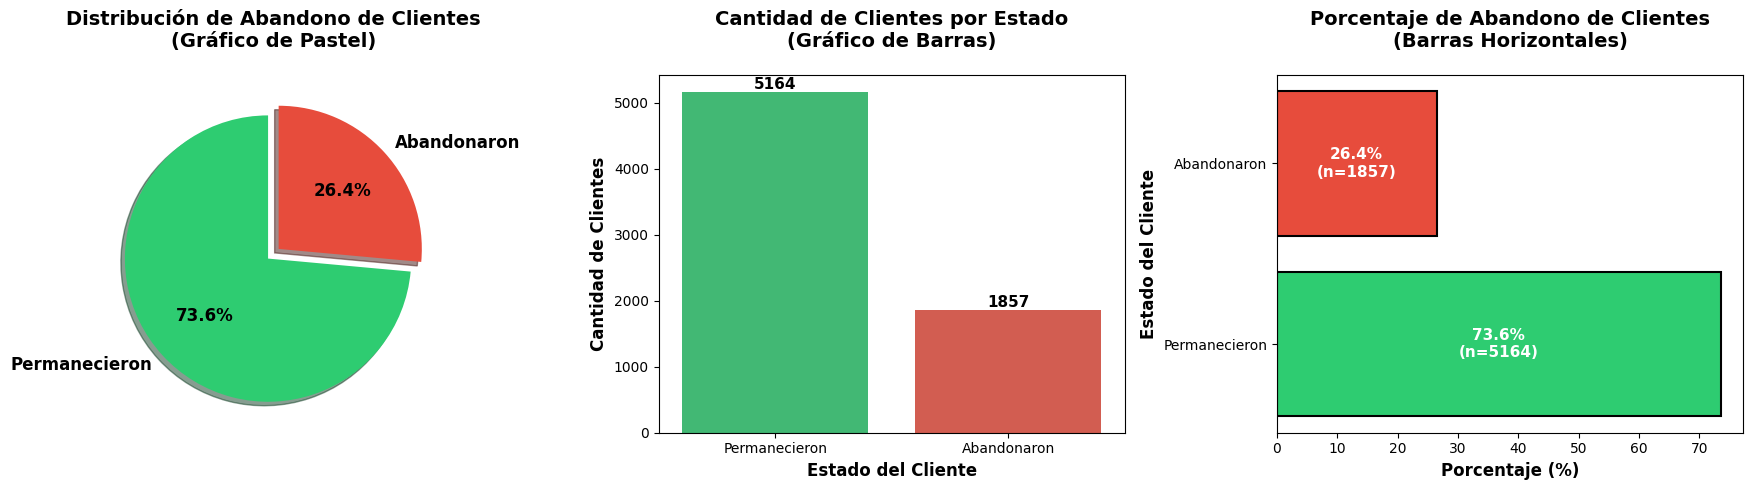


ESTADÍSTICAS DE ABANDONO DE CLIENTES

Total de clientes: 7,021

Clientes que permanecieron: 5,164 (73.55%)
Clientes que abandonaron: 1,857 (26.45%)

Tasa de abandono (Churn Rate): 26.45%
Tasa de retención: 73.55%


In [15]:
# 1. Gráfico de pastel
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Conteo de valores de Abandono
conteo_abandono = datos_clientes['Abandono'].value_counts()
etiquetas = ['Permanecieron', 'Abandonaron']
colores = ['#2ecc71', '#e74c3c']

# Gráfico 1: Pastel
axes[0].pie(conteo_abandono, labels=etiquetas, autopct='%1.1f%%',
            startangle=90, colors=colores, explode=(0.05, 0.05),
            shadow=True, textprops={'fontsize': 12, 'weight': 'bold'})
axes[0].set_title('Distribución de Abandono de Clientes\n(Gráfico de Pastel)',
                   fontsize=14, weight='bold', pad=20)

# Gráfico 2: Barras verticales
sns.countplot(data=datos_clientes, x='Abandono', palette=colores, ax=axes[1])
axes[1].set_title('Cantidad de Clientes por Estado\n(Gráfico de Barras)',
                   fontsize=14, weight='bold', pad=20)
axes[1].set_xlabel('Estado del Cliente', fontsize=12, weight='bold')
axes[1].set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')
axes[1].set_xticklabels(['Permanecieron', 'Abandonaron'])

# Agregar valores sobre las barras
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%d', fontsize=11, weight='bold')

# Gráfico 3: Barras horizontales con porcentajes
porcentajes = (conteo_abandono / conteo_abandono.sum() * 100).values
axes[2].barh(etiquetas, porcentajes, color=colores, edgecolor='black', linewidth=1.5)
axes[2].set_title('Porcentaje de Abandono de Clientes\n(Barras Horizontales)',
                   fontsize=14, weight='bold', pad=20)
axes[2].set_xlabel('Porcentaje (%)', fontsize=12, weight='bold')
axes[2].set_ylabel('Estado del Cliente', fontsize=12, weight='bold')

# Agregar valores en las barras
for i, (porc, count) in enumerate(zip(porcentajes, conteo_abandono.values)):
    axes[2].text(porc/2, i, f'{porc:.1f}%\n(n={count})',
                 ha='center', va='center', fontsize=11, weight='bold', color='white')

plt.tight_layout()
plt.show()

# Imprimir estadísticas
print('\n' + '='*50)
print('ESTADÍSTICAS DE ABANDONO DE CLIENTES')
print('='*50)
print(f'\nTotal de clientes: {len(datos_clientes):,}')
print(f'\nClientes que permanecieron: {conteo_abandono[0]:,} ({porcentajes[0]:.2f}%)')
print(f'Clientes que abandonaron: {conteo_abandono[1]:,} ({porcentajes[1]:.2f}%)')
print(f'\nTasa de abandono (Churn Rate): {porcentajes[1]:.2f}%')
print(f'Tasa de retención: {porcentajes[0]:.2f}%')
print('='*50)

### **Recuento de evasión por variables categóricas**

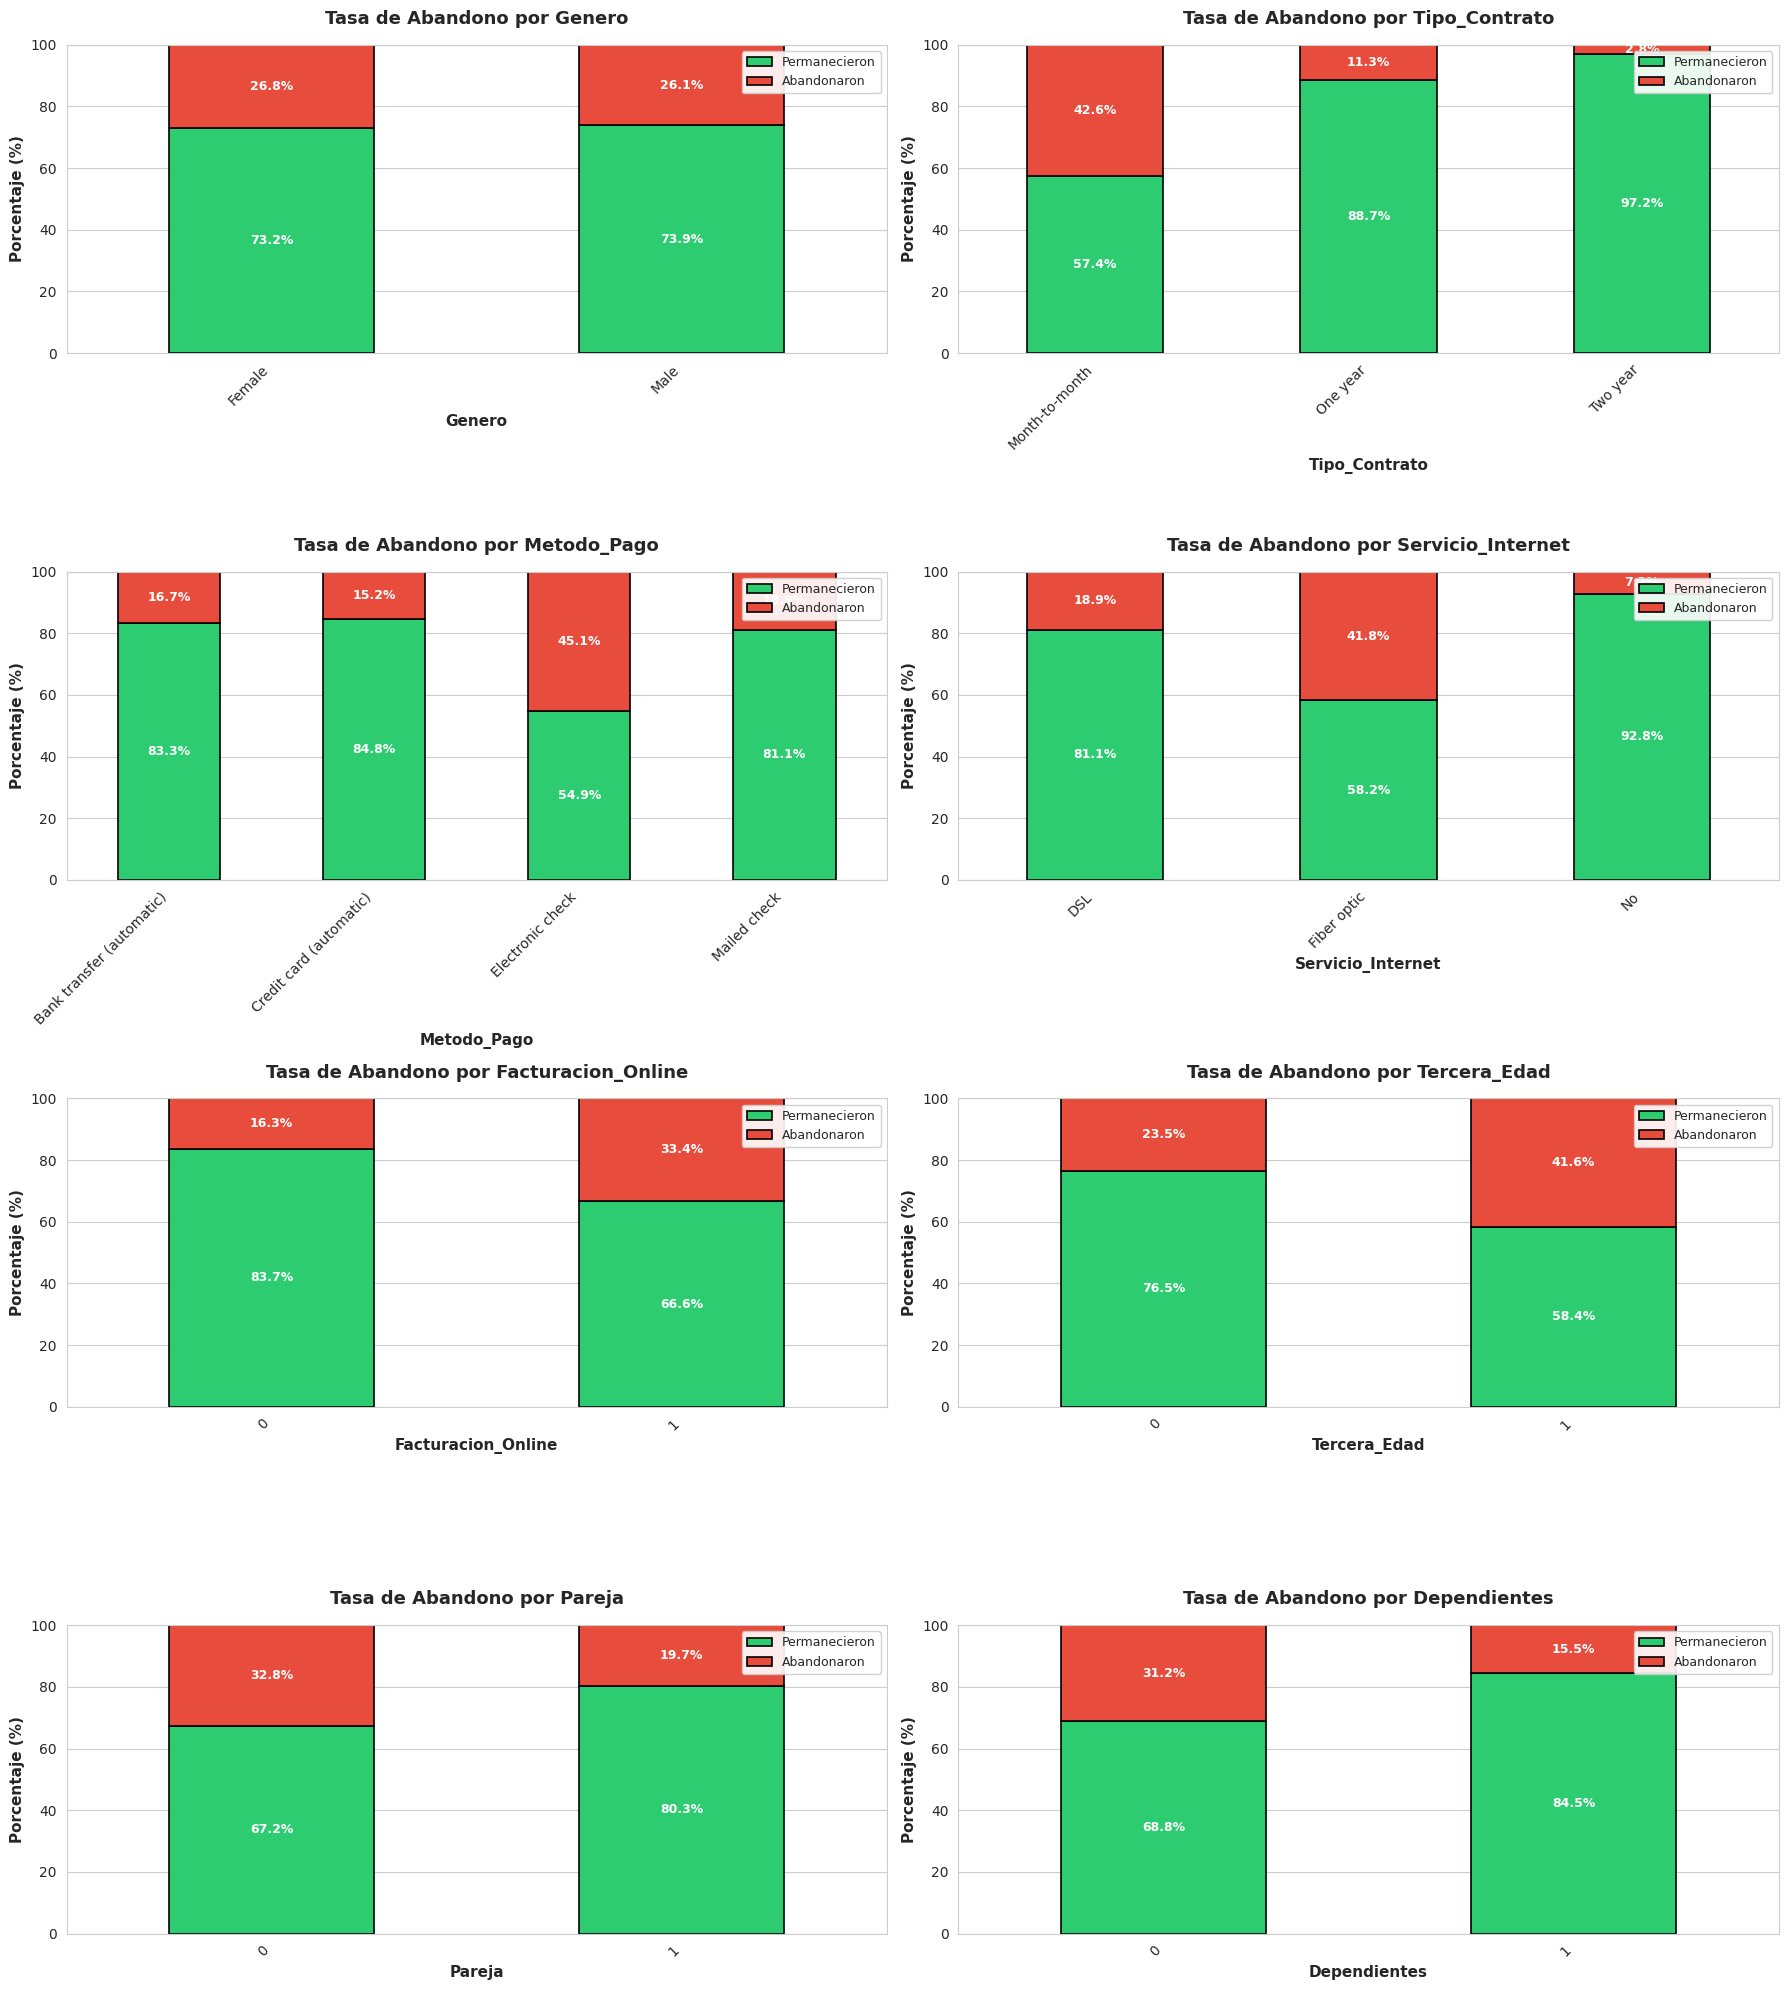


ANÁLISIS DETALLADO DE ABANDONO POR VARIABLE CATEGÓRICA

 GENERO:
--------------------------------------------------------------------------------

Conteo absoluto:
Abandono     0     1  Total
Genero                     
Female    2546   934   3480
Male      2618   923   3541
Total     5164  1857   7021

Porcentaje de abandono por categoría:
Abandono     0     1
Genero              
Female   73.16 26.84
Male     73.93 26.07
--------------------------------------------------------------------------------

 TIPO_CONTRATO:
--------------------------------------------------------------------------------

Conteo absoluto:
Abandono           0     1  Total
Tipo_Contrato                    
Month-to-month  2210  1643   3853
One year        1307   166   1473
Two year        1647    48   1695
Total           5164  1857   7021

Porcentaje de abandono por categoría:
Abandono           0     1
Tipo_Contrato             
Month-to-month 57.36 42.64
One year       88.73 11.27
Two year       97.17  2.

In [16]:
import warnings # Para ignorar advertencias
warnings.filterwarnings('ignore')

# Selección de variables categóricas relevantes
variables_categoricas = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet',
                         'Facturacion_Online', 'Tercera_Edad', 'Pareja', 'Dependientes']

# Configuración del estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Crear figura con subplots
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
axes = axes.flatten()

# Colores personalizados para churn
colores_churn = ['#2ecc71', '#e74c3c']

for idx, variable in enumerate(variables_categoricas):
    # Creación de una tabla de contingencia
    tabla_contingencia = pd.crosstab(datos_clientes[variable],
                                     datos_clientes['Abandono'],
                                     normalize='index') * 100

    # Gráfico de barras apiladas
    tabla_contingencia.plot(kind='bar', stacked=True, ax=axes[idx],
                           color=colores_churn, edgecolor='black', linewidth=1.2)

    # Personalizar el gráfico
    axes[idx].set_title(f'Tasa de Abandono por {variable}',
                       fontsize=13, weight='bold', pad=15)
    axes[idx].set_xlabel(variable, fontsize=11, weight='bold')
    axes[idx].set_ylabel('Porcentaje (%)', fontsize=11, weight='bold')
    axes[idx].legend(['Permanecieron', 'Abandonaron'], loc='upper right',
                     fontsize=9, framealpha=0.9)
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right')
    axes[idx].set_ylim(0, 100)

    # Agregar valores en las barras
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%', label_type='center',
                           fontsize=9, weight='bold', color='white')

plt.tight_layout()
plt.show()

# Estadísticas detalladas por variable
print('\n' + '='*80)
print('ANÁLISIS DETALLADO DE ABANDONO POR VARIABLE CATEGÓRICA')
print('='*80)

for variable in variables_categoricas:
    print(f'\n {variable.upper()}:')
    print('-' * 80)

    tabla = pd.crosstab(datos_clientes[variable],
                       datos_clientes['Abandono'],
                       margins=True, margins_name='Total')

    # Calcular porcentajes
    porcentajes = pd.crosstab(datos_clientes[variable],
                             datos_clientes['Abandono'],
                             normalize='index') * 100

    print('\nConteo absoluto:')
    print(tabla)
    print('\nPorcentaje de abandono por categoría:')
    print(porcentajes.round(2))
    print('-' * 80)

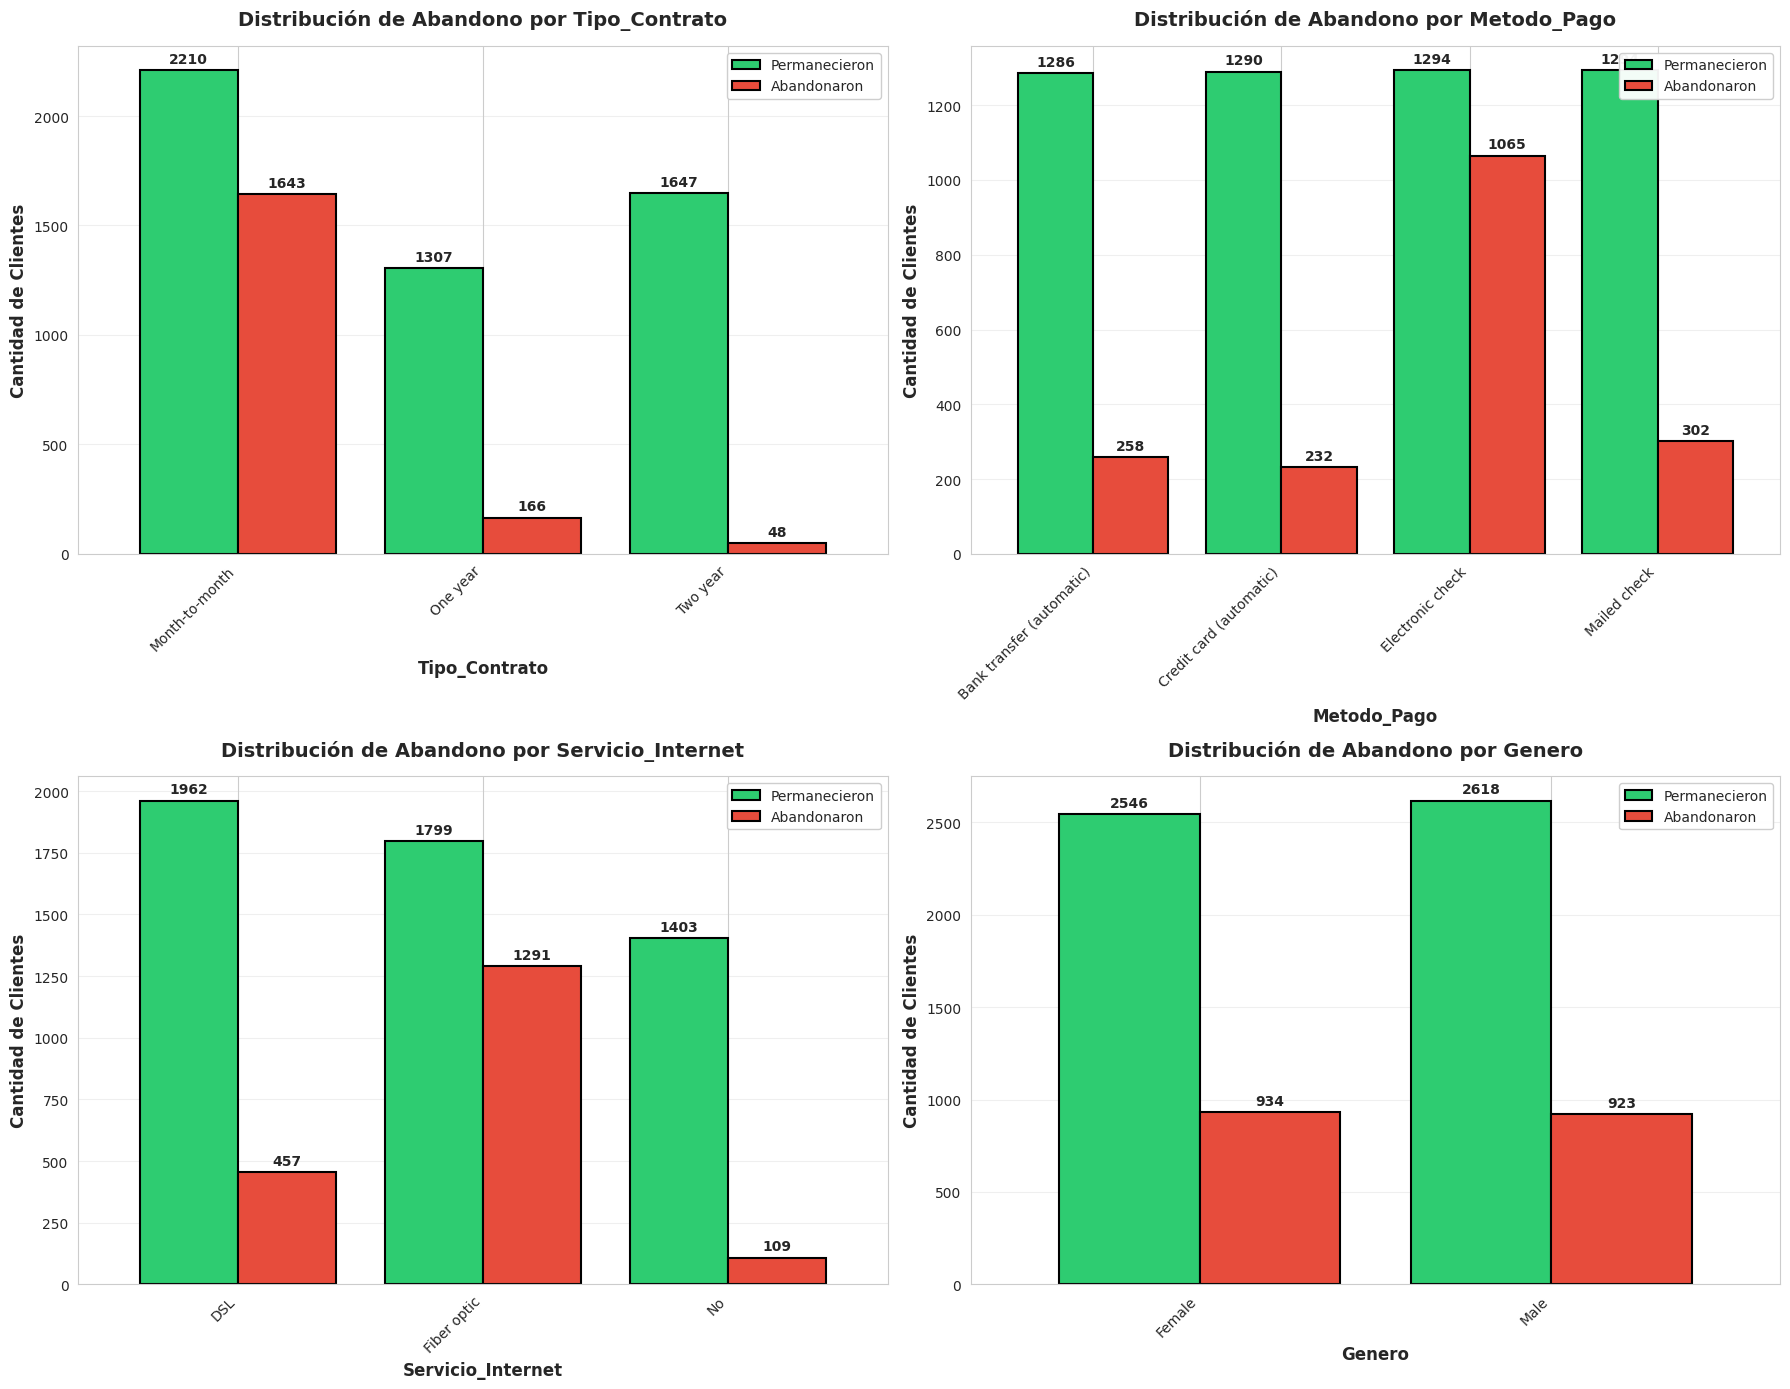

In [17]:
# Análisis comparativo - Gráfico de barras agrupadas
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Variables de mayor interés
variables_principales = ['Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet', 'Genero']

for idx, variable in enumerate(variables_principales):
    ax = axes[idx // 2, idx % 2]

    # Tabla de contingencia para conteos
    tabla = pd.crosstab(datos_clientes[variable], datos_clientes['Abandono'])

    # Gráfico de barras agrupadas
    tabla.plot(kind='bar', ax=ax, color=colores_churn,
              edgecolor='black', linewidth=1.5, width=0.8)

    ax.set_title(f'Distribución de Abandono por {variable}',
                fontsize=14, weight='bold', pad=15)
    ax.set_xlabel(variable, fontsize=12, weight='bold')
    ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')
    ax.legend(['Permanecieron', 'Abandonaron'], loc='upper right',
             fontsize=10, framealpha=0.95)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)

    # Para agregar valores sobre las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, weight='bold', padding=3)

plt.tight_layout()
plt.show()

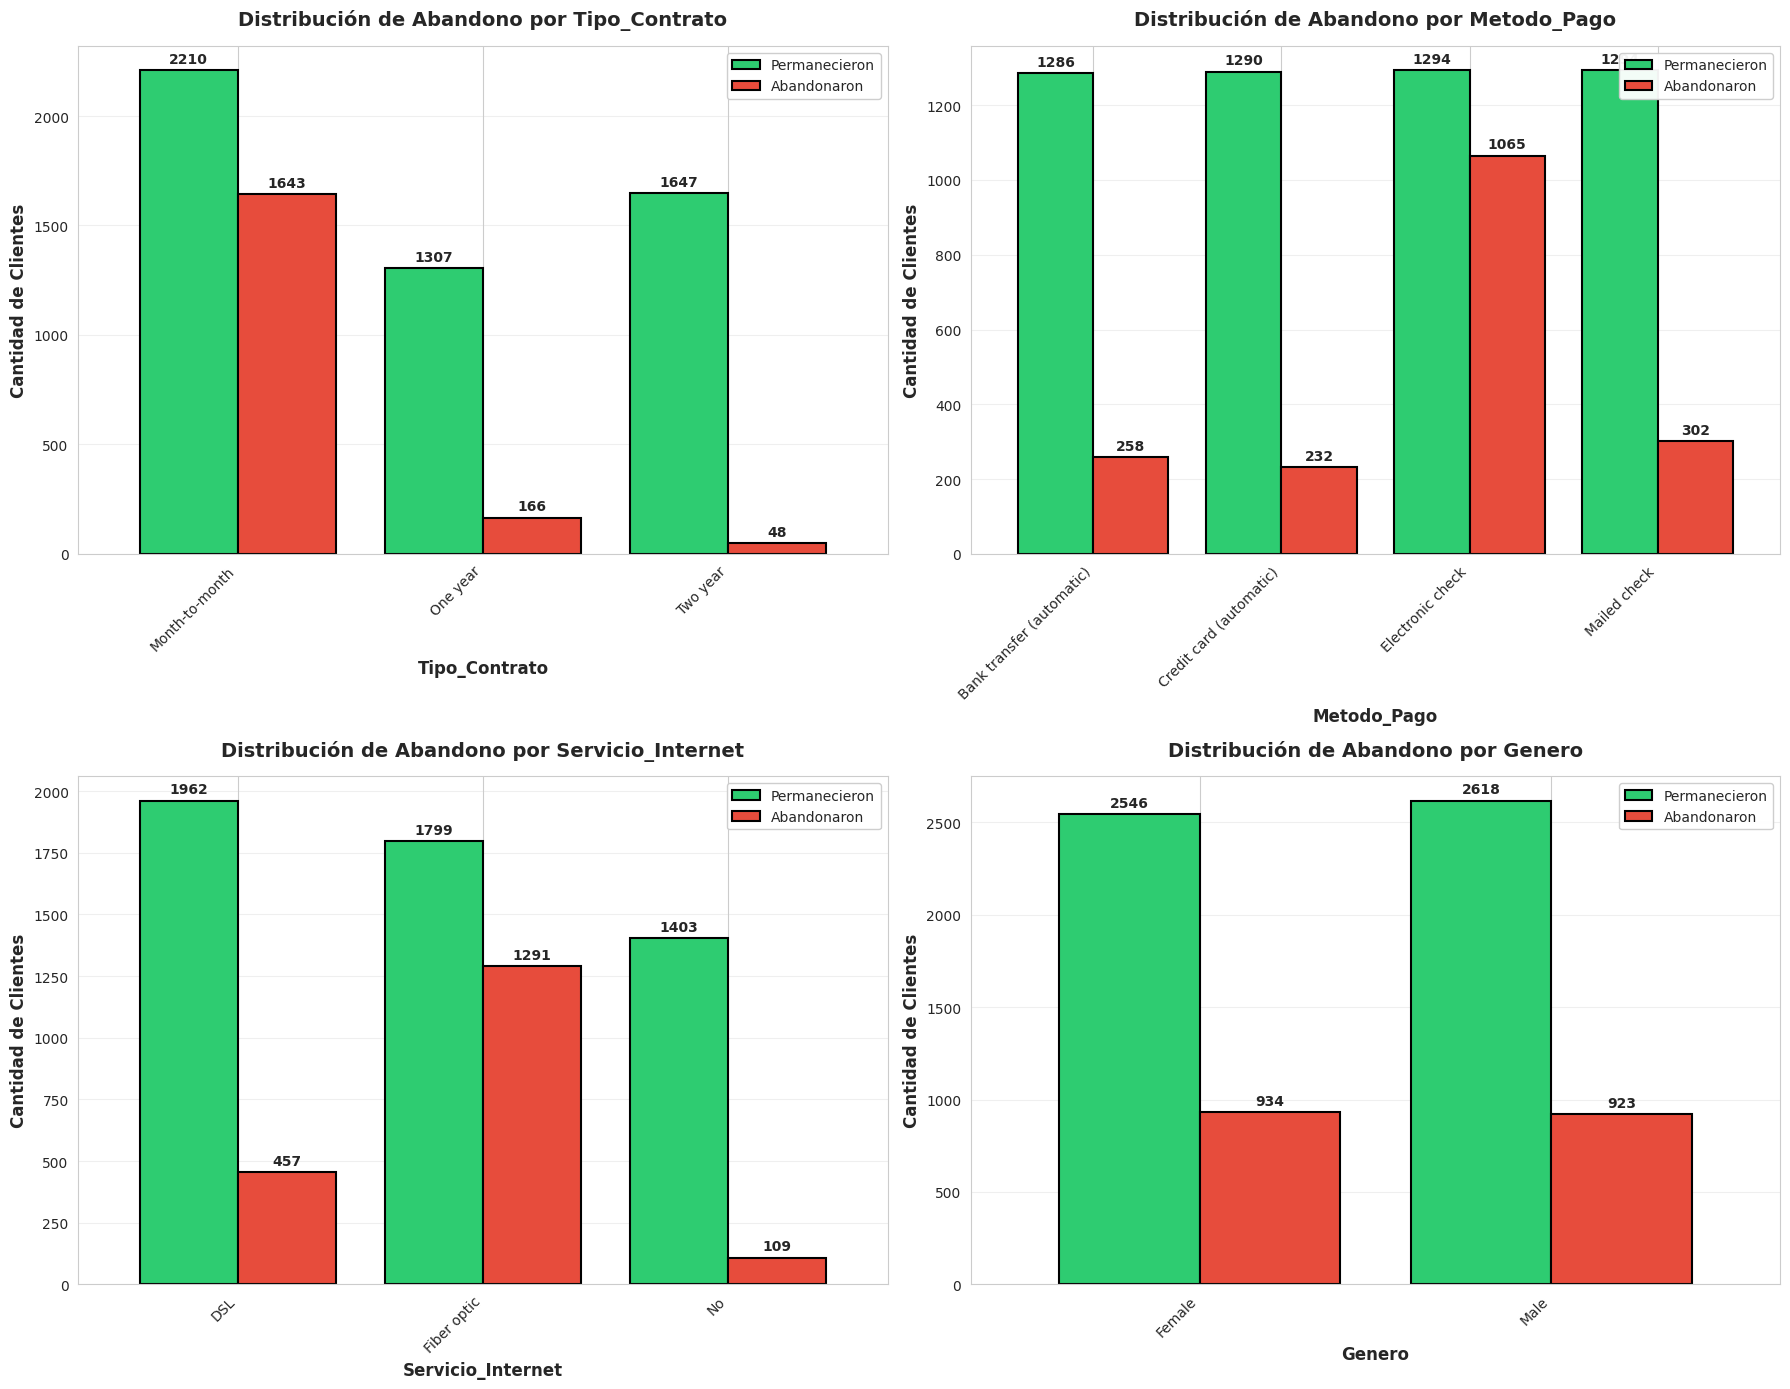


HALLAZGOS CLAVE SOBRE ABANDONO DE CLIENTES

Genero:
   ✓ Mayor abandono: Female (26.84%)
   ✓ Menor abandono: Male (26.07%)
   ✓ Diferencia: 0.77 puntos porcentuales

Tipo_Contrato:
   ✓ Mayor abandono: Month-to-month (42.64%)
   ✓ Menor abandono: Two year (2.83%)
   ✓ Diferencia: 39.81 puntos porcentuales

Metodo_Pago:
   ✓ Mayor abandono: Electronic check (45.15%)
   ✓ Menor abandono: Credit card (automatic) (15.24%)
   ✓ Diferencia: 29.90 puntos porcentuales

Servicio_Internet:
   ✓ Mayor abandono: Fiber optic (41.78%)
   ✓ Menor abandono: No (7.21%)
   ✓ Diferencia: 34.57 puntos porcentuales

Facturacion_Online:
   ✓ Mayor abandono: 1 (33.43%)
   ✓ Menor abandono: 0 (16.29%)
   ✓ Diferencia: 17.14 puntos porcentuales

Tercera_Edad:
   ✓ Mayor abandono: 1 (41.63%)
   ✓ Menor abandono: 0 (23.50%)
   ✓ Diferencia: 18.13 puntos porcentuales

Pareja:
   ✓ Mayor abandono: 0 (32.83%)
   ✓ Menor abandono: 1 (19.66%)
   ✓ Diferencia: 13.16 puntos porcentuales

Dependientes:
   ✓ Mayor aban

In [18]:
# Análisis comparativo - Gráfico de barras agrupadas
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Variables de mayor interés
variables_principales = ['Tipo_Contrato', 'Metodo_Pago', 'Servicio_Internet', 'Genero']

for idx, variable in enumerate(variables_principales):
    ax = axes[idx // 2, idx % 2]

    # Tabla de contingencia para conteos
    tabla = pd.crosstab(datos_clientes[variable], datos_clientes['Abandono'])

    # Gráfico de barras agrupadas
    tabla.plot(kind='bar', ax=ax, color=colores_churn,
              edgecolor='black', linewidth=1.5, width=0.8)

    ax.set_title(f'Distribución de Abandono por {variable}',
                fontsize=14, weight='bold', pad=15)
    ax.set_xlabel(variable, fontsize=12, weight='bold')
    ax.set_ylabel('Cantidad de Clientes', fontsize=12, weight='bold')
    ax.legend(['Permanecieron', 'Abandonaron'], loc='upper right',
             fontsize=10, framealpha=0.95)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(axis='y', alpha=0.3)

    # Para agregar valores sobre las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontsize=10, weight='bold', padding=3)

plt.tight_layout()
plt.show()

# Resumen de hallazgos clave
print('\n' + '='*80)
print('HALLAZGOS CLAVE SOBRE ABANDONO DE CLIENTES')
print('='*80)

tasa_promedio = datos_clientes['Abandono'].mean() * 100

for variable in variables_categoricas:
    tasas = datos_clientes.groupby(variable)['Abandono'].mean() * 100
    categoria_mayor = tasas.idxmax()
    tasa_mayor = tasas.max()
    categoria_menor = tasas.idxmin()
    tasa_menor = tasas.min()

    print(f'\n{variable}:')
    print(f'   ✓ Mayor abandono: {categoria_mayor} ({tasa_mayor:.2f}%)')
    print(f'   ✓ Menor abandono: {categoria_menor} ({tasa_menor:.2f}%)')
    print(f'   ✓ Diferencia: {tasa_mayor - tasa_menor:.2f} puntos porcentuales')

print('\n' + '='*80)


### **Conteo de evasión por variables numéricas**

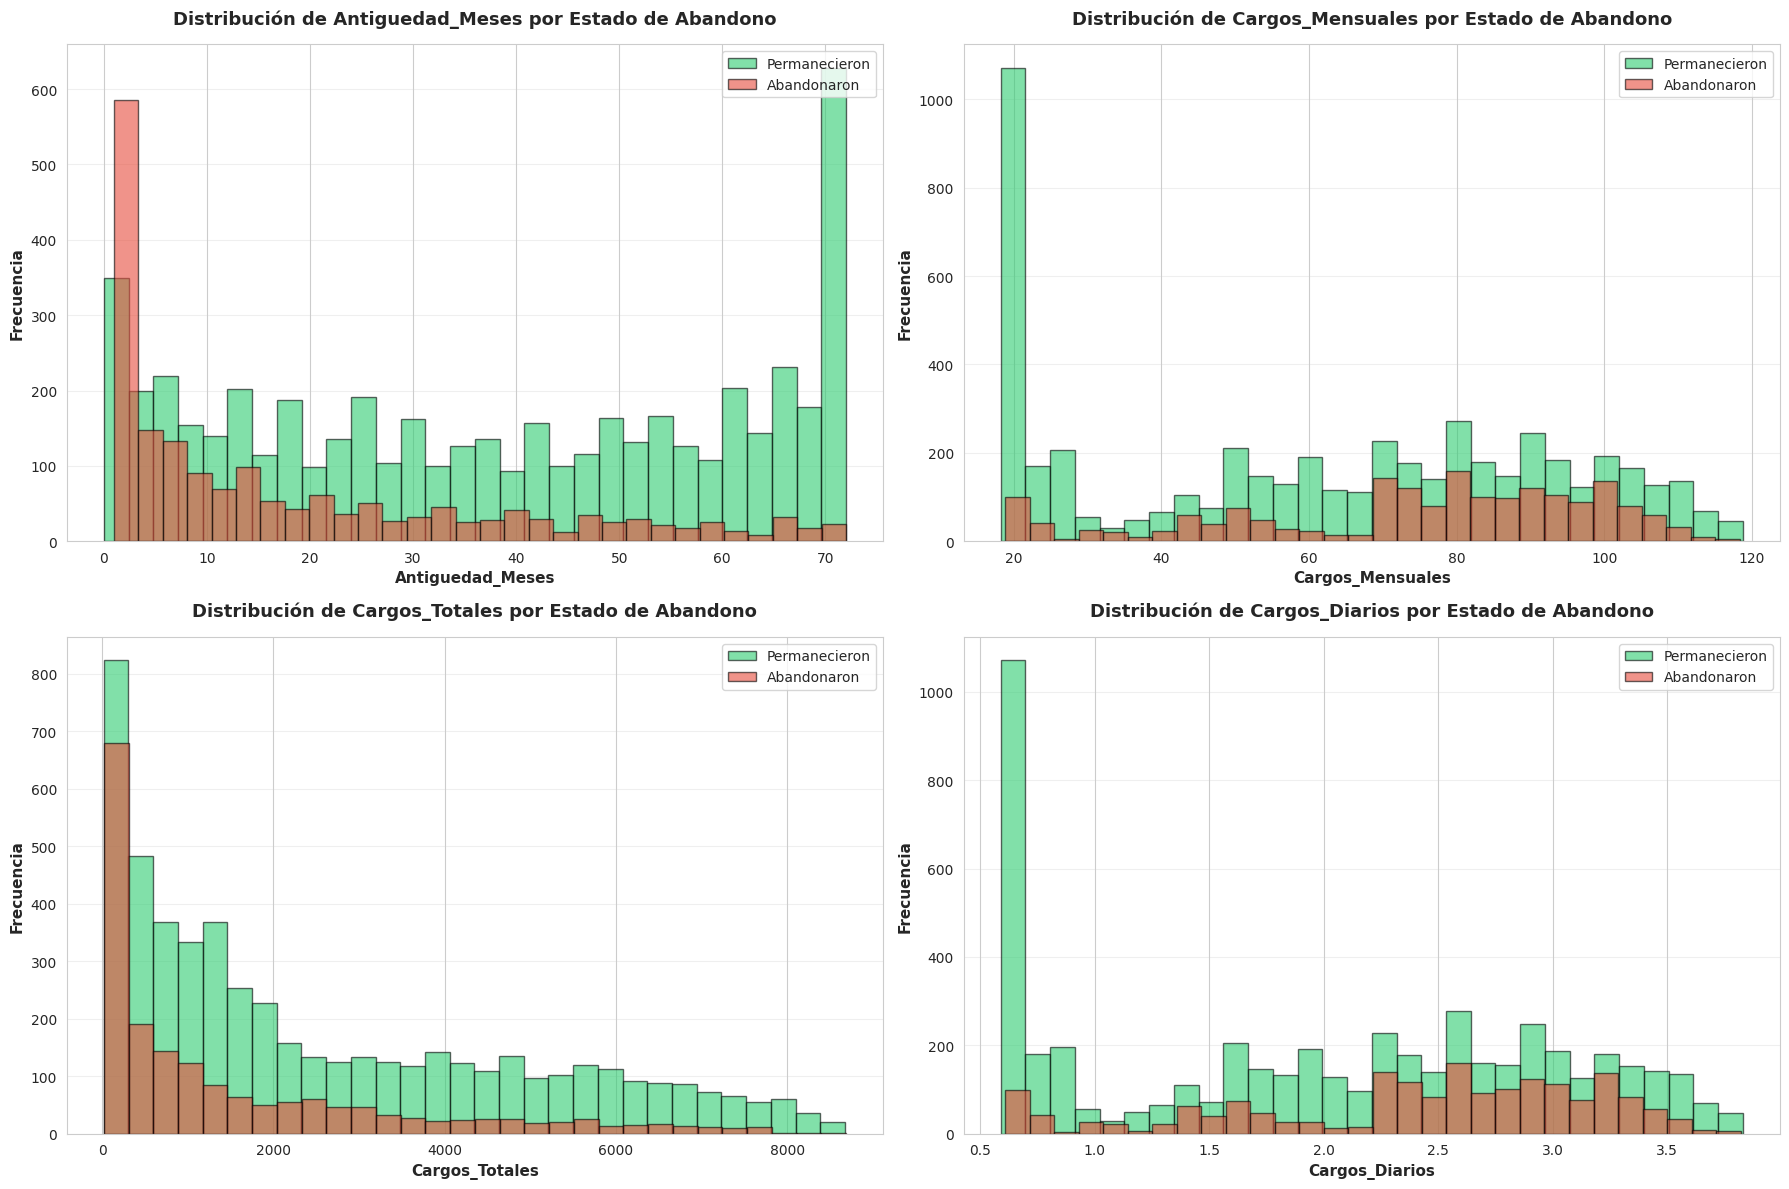

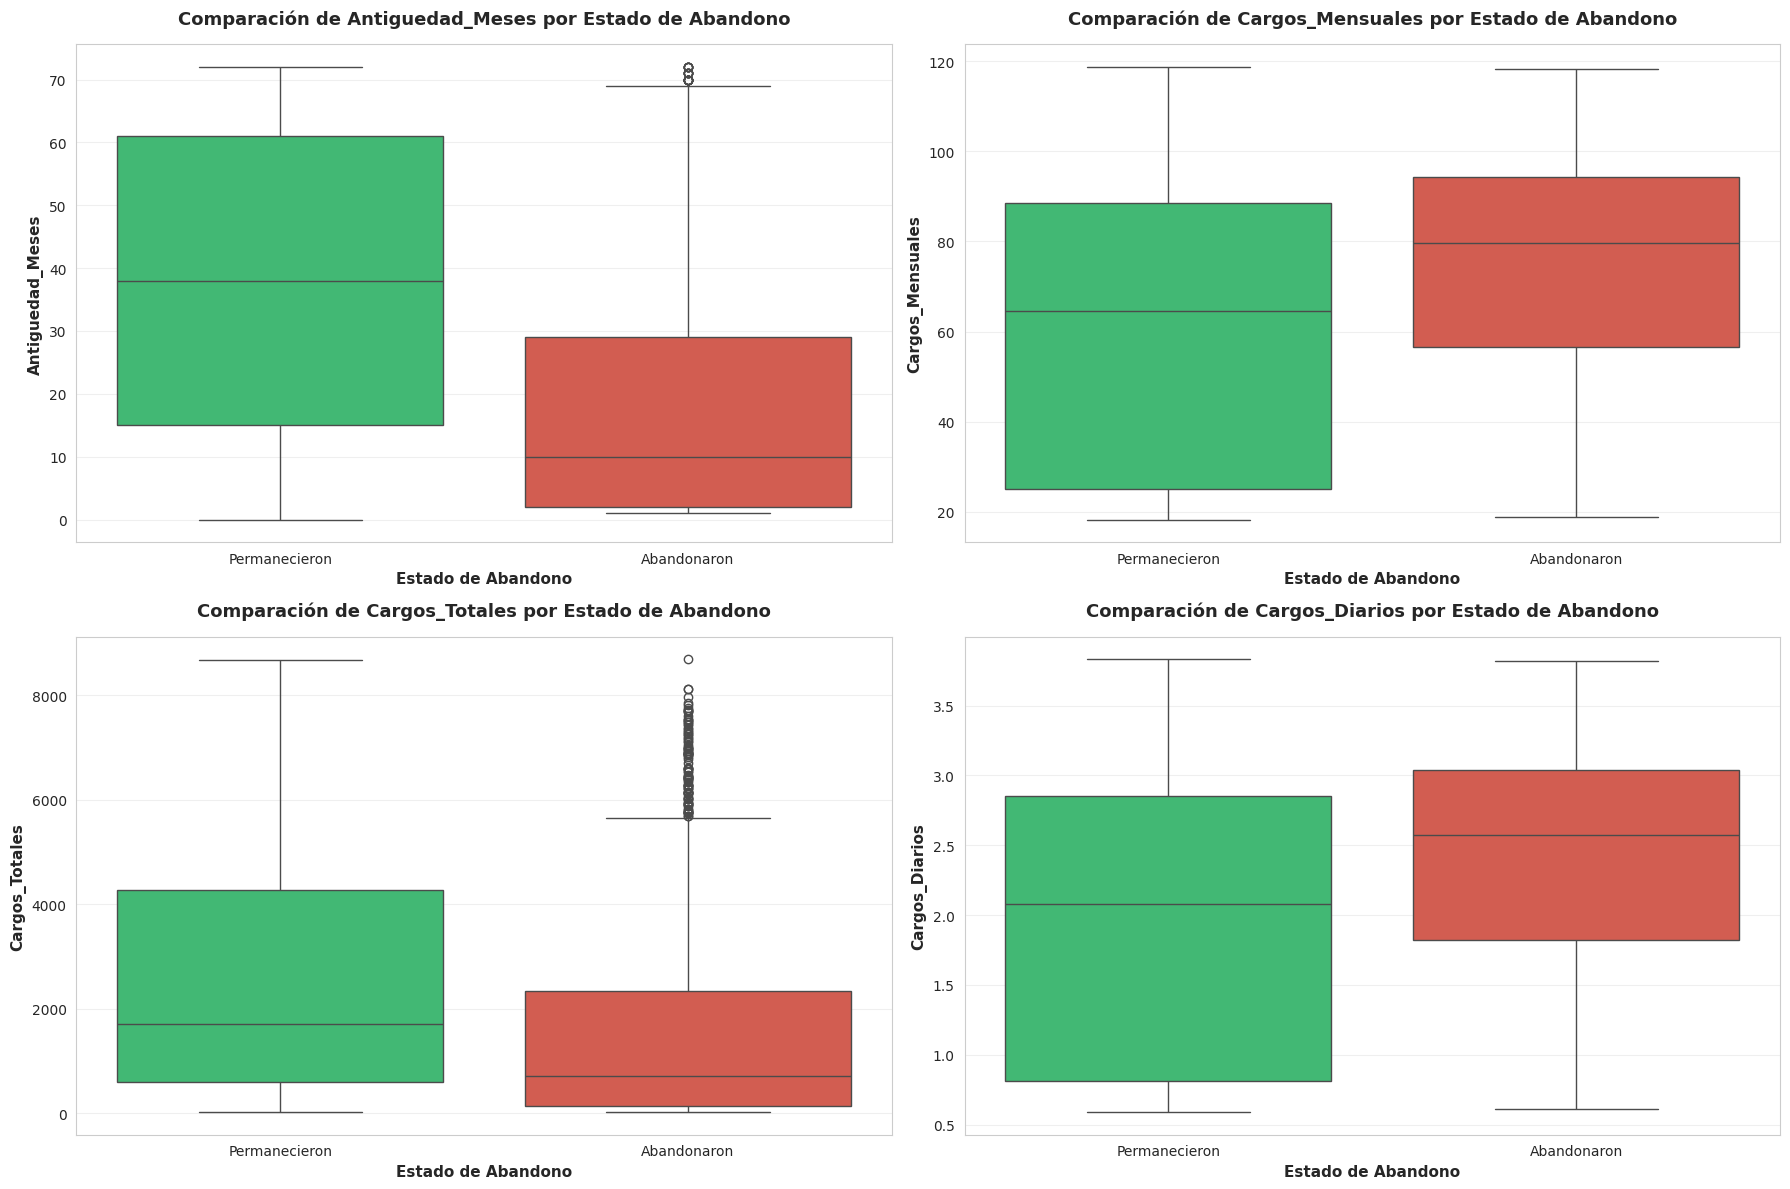


ANÁLISIS ESTADÍSTICO DE VARIABLES NUMÉRICAS POR ESTADO DE ABANDONO

ANTIGUEDAD_MESES:
--------------------------------------------------------------------------------

Estadísticas descriptivas:
                count  mean   std  min   25%   50%   75%   max
Permanecieron 5164.00 37.64 24.08 0.00 15.00 38.00 61.00 72.00
Abandonaron   1857.00 18.09 19.55 1.00  2.00 10.00 29.00 72.00

Promedio (Permanecieron): 37.64
Promedio (Abandonaron): 18.09
Diferencia: -19.55 (-51.94%)
--------------------------------------------------------------------------------

CARGOS_MENSUALES:
--------------------------------------------------------------------------------

Estadísticas descriptivas:
                count  mean   std   min   25%   50%   75%    max
Permanecieron 5164.00 61.34 31.07 18.25 25.10 64.50 88.46 118.75
Abandonaron   1857.00 74.60 24.60 18.85 56.50 79.70 94.25 118.35

Promedio (Permanecieron): 61.34
Promedio (Abandonaron): 74.60
Diferencia: 13.26 (21.61%)
-----------------------------

In [19]:
warnings.filterwarnings('ignore')

# Seleccionar variables numéricas relevantes
variables_numericas = ['Antiguedad_Meses', 'Cargos_Mensuales', 'Cargos_Totales', 'Cargos_Diarios']

# Configurar estilo
sns.set_style("whitegrid")
colores_churn = ['#2ecc71', '#e74c3c']

# 1. Histogramas con distribución por estado de abandono
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, variable in enumerate(variables_numericas):
    for abandono, color, label in zip([0, 1], colores_churn, ['Permanecieron', 'Abandonaron']):
        datos = datos_clientes[datos_clientes['Abandono'] == abandono][variable]
        axes[idx].hist(datos, bins=30, alpha=0.6, color=color, label=label, edgecolor='black')

    axes[idx].set_title(f'Distribución de {variable} por Estado de Abandono',
                       fontsize=13, weight='bold', pad=15)
    axes[idx].set_xlabel(variable, fontsize=11, weight='bold')
    axes[idx].set_ylabel('Frecuencia', fontsize=11, weight='bold')
    axes[idx].legend(loc='upper right', fontsize=10)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Boxplots comparativos
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for idx, variable in enumerate(variables_numericas):
    sns.boxplot(data=datos_clientes, x='Abandono', y=variable,
                palette=colores_churn, ax=axes[idx])

    axes[idx].set_title(f'Comparación de {variable} por Estado de Abandono',
                       fontsize=13, weight='bold', pad=15)
    axes[idx].set_xlabel('Estado de Abandono', fontsize=11, weight='bold')
    axes[idx].set_ylabel(variable, fontsize=11, weight='bold')
    axes[idx].set_xticklabels(['Permanecieron', 'Abandonaron'])
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas descriptivas por variable y estado de abandono
print('\n' + '='*80)
print('ANÁLISIS ESTADÍSTICO DE VARIABLES NUMÉRICAS POR ESTADO DE ABANDONO')
print('='*80)

for variable in variables_numericas:
    print(f'\n{variable.upper()}:')
    print('-' * 80)

    # Estadísticas por grupo
    stats_por_grupo = datos_clientes.groupby('Abandono')[variable].describe()
    stats_por_grupo.index = ['Permanecieron', 'Abandonaron']

    print('\nEstadísticas descriptivas:')
    print(stats_por_grupo)

    # Promedios
    promedio_permanecieron = datos_clientes[datos_clientes['Abandono'] == 0][variable].mean()
    promedio_abandonaron = datos_clientes[datos_clientes['Abandono'] == 1][variable].mean()
    diferencia = promedio_abandonaron - promedio_permanecieron

    print(f'\nPromedio (Permanecieron): {promedio_permanecieron:.2f}')
    print(f'Promedio (Abandonaron): {promedio_abandonaron:.2f}')
    print(f'Diferencia: {diferencia:.2f} ({(diferencia/promedio_permanecieron*100):.2f}%)')
    print('-' * 80)

# Resumen de hallazgos
print('\n' + '='*80)
print('HALLAZGOS CLAVE SOBRE VARIABLES NUMÉRICAS')
print('='*80)

for variable in variables_numericas:
    prom_perm = datos_clientes[datos_clientes['Abandono'] == 0][variable].mean()
    prom_aban = datos_clientes[datos_clientes['Abandono'] == 1][variable].mean()

    if prom_aban > prom_perm:
        tendencia = "MAYOR"
        dif_pct = ((prom_aban - prom_perm) / prom_perm) * 100
    else:
        tendencia = "MENOR"
        dif_pct = ((prom_perm - prom_aban) / prom_perm) * 100

    print(f'\n{variable}:')
    print(f'   Los clientes que abandonaron tienen {tendencia} {variable}')
    print(f'   Diferencia porcentual: {dif_pct:.2f}%')

print('\n' + '='*80)

## 📄**Informe final**

### **Introducción**


La empresa **Telecom X** enfrenta una **alta tasa de cancelaciones que afecta su rentabilidad y crecimiento**. Este análisis tiene como objetivo **identificar los factores que influyen en la evasión de clientes (Churn)** mediante el procesamiento y análisis de datos históricos de **7,043 clientes**. El estudio busca proporcionar insights accionables para desarrollar estrategias efectivas de retención y reducir la tasa de abandono actual del **26.54%**.

### **Limpieza y Tratamiento de Datos**

**Importación y Normalización**
- Los datos originales en formato JSON fueron normalizados para crear un DataFrame estructurado con 19 columnas consideradas relevantes para el análisis de la situación.
- Se eliminaron 5 registros duplicados, manteniendo 7,038 registros únicos para el análisis.

**Tratamiento de Valores Faltantes**
- Se detectaron 11 valores faltantes en la columna `Cargos_Totales`, los cuales fueron imputados con la media ($2,283.30).
- Se eliminaron 5 registros con valores vacíos en la variable objetivo `Abandono`.

**Transformación de Variables**
- Variables binarias (Yes/No) fueron convertidas a formato numérico (1/0) para facilitar el análisis.
- Se creó la variable `Cargos_Diarios` calculada como: Cargos_Mensuales / 31.
- Las columnas fueron traducidas al español para mejorar la interpretabilidad.

### **Análisis Exploratorio de Datos**

**Estadísticas Descriptivas Generales**
- **Tasa de Abandono**: 26.54% (1,869 clientes abandonaron vs 5,169 permanecieron).
- **Antigüedad Promedio**: 32.37 meses (σ = 24.56 meses).
- **Cargos Mensuales**: Media de $64.76, mediana de $70.35.
- **Cargos Totales**: Media de $2,283.30, mediana de $1,397.47 (alta dispersión).


#### **Análisis por Variables Categóricas:**

**Factores de Alto Riesgo de Abandono:**
- **Tipo de Contrato**: Clientes con contrato mes a mes presentan una tasa de abandono del 42.71%, comparado con 11.28% en contratos de dos años.
- **Método de Pago**: Cheque electrónico muestra la mayor tasa de abandono (45.29%), mientras que el débito automático tiene la menor (16.67%).
- **Servicio de Internet**: Clientes con Fiber optic abandonan en un 41.89%, DSL en 18.96%, y sin servicio de internet en 7.43%.
- **Facturación Online**: Clientes con facturación electrónica abandonan más (33.57%) que aquellos con factura física (16.67%).

**Factores Demográficos:**
- **Tercera Edad**: 41.68% de adultos mayores abandonan vs 23.61% de clientes menores de 65 años.
- **Estado Civil**: Clientes sin pareja (32.96%) abandonan más que aquellos con pareja (19.66%).
- **Dependientes**: Clientes sin dependientes (31.28%) tienen mayor tasa de abandono que aquellos con dependientes (15.47%).
- **Género**: Diferencia mínima (26.92% hombres vs 26.16% mujeres).

#### **Análisis por Variables Numéricas:**


**Antigüedad en Meses:**
- Clientes que abandonaron tienen una antigüedad promedio de 17.89 meses (-44.83% respecto a los que permanecen).
- Los clientes fieles tienen en promedio 37.57 meses de antigüedad.


**Cargos Mensuales:**
- Los clientes que abandonaron pagan en promedio $74.44 mensuales (+15.84% más que los que permanecen).
- Esto sugiere que clientes con planes más costosos son más propensos a abandonar.


**Cargos Totales:**
- Clientes que abandonaron gastaron en promedio $1,531.80 total (-49.15% menos que los clientes fieles).
- Esto correlaciona con la menor antigüedad de estos clientes.

### **Conclusiones e Insights**

#### **Hallazgos principales**

1. **La flexibilidad contractual aumenta el riesgo**: Contratos mensuales tienen 3.8 veces más probabilidad de abandono que contratos anuales.
2. **El método de pago es crítico**: El cheque electrónico genera 2.7 veces más abandono que el débito automático.
3. **La antigüedad es protectora**: Clientes con menos de 18 meses tienen el mayor riesgo de abandono.
4. **Los servicios adicionales retienen**: Clientes sin servicios complementarios (seguridad online, soporte técnico) abandonan más.
5. **Fiber optic presenta un problema**: A pesar de ser el servicio premium, tiene la mayor tasa de abandono, sugiriendo problemas de precio-valor percibido.

#### **Segmentos de alto riesgo**

- Los clientes nuevos (< 12 meses) con contrato mensual.
- Los adultos mayores sin pareja ni dependientes.
- Los usuarios de fibra óptica con facturación online.
- Los clientes que pagan con cheque electrónico.

### **Recomendaciones**

1. **Incentivar contratos de largo plazo**: Ofrecer descuentos del 10-15% o servicios adicionales gratuitos para clientes que migren de contratos mensuales a anuales o bianuales, reduciendo la flexibilidad de cancelación.

2. **Promover métodos de pago automáticos**: Implementar campañas para migrar clientes de cheque electrónico a débito automático, ofreciendo un descuento del 5% como incentivo inicial.

3. **Programa de retención temprana**: Crear un plan de onboarding estructurado con contacto proactivo en los meses 3, 6 y 12 para clientes nuevos, incluyendo ofertas personalizadas y descuentos progresivos.

4. **Revisar estrategia de Fiber Optic**: Investigar la relación precio-valor del servicio de fibra óptica y considerar ajustar precios, mejorar beneficios incluidos, o crear paquetes combinados más atractivos.

5. **Segmentación demográfica específica**: Desarrollar ofertas diferenciadas para adultos mayores con soporte dedicado, programas familiares para clientes con dependientes, y planes flexibles para personas sin pareja.